In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv("advertising.xls")

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

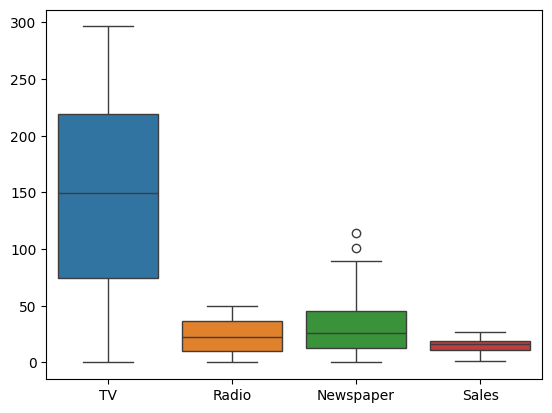

In [7]:
sns.boxplot(df) # for outlier detection 

## As we see the outlier occur so to fix those outliers for good model 

In [8]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [9]:
df = df[(df['Newspaper'] >= lower_bound) & (df['Newspaper'] <= upper_bound)]

<Axes: >

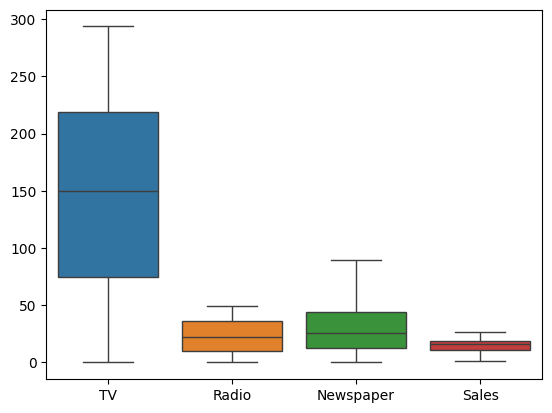

In [10]:
sns.boxplot(df)

## So as we see there is no outlier 

## Splitting data into Train data and Test Data

In [11]:
X=df.drop(columns = ['Sales'],axis=1)

In [12]:
Y=df['Sales']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

# Training the data 

## LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

In [17]:
r2_score(Y_test, y_pred)

0.8507302504933119

## Random Forest Regression

In [18]:
RFR = RandomForestRegressor()

In [19]:
RFR.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
RFR_pred = RFR.predict(X_test)

In [21]:
r2_score(Y_test,RFR_pred)

0.9322641804749526